# Описание проекта

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

Данные за 2016 год могут быть неполными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования** - Необходимо выявить определяющие успешность игры закономерности.

Проверить две гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## 1. Изучение данных из файла

In [128]:
# скачаем библиотеку
!pip install sidetable 

In [129]:
# импортируем библиотеки 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
from scipy import stats as st

In [130]:
# открываем таблицу и запрашиваем все атрибуты 
try:
    games = pd.read_csv('/Users/games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')    
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [131]:
# проверка данных
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Можно наблюдать большое количество пропусков, проблемы с названием столбцов, а так же есть проблемы с типами данных, начнем предобработку данных

## 2. Предобработка данных

### 2.1. Для начала приведем названия столбцов к нижнему регистру.

In [132]:
# переводим столбцы в нижний регистр 
games.columns = games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Отлично, изменили названия столбцов, самое время заняться типами данных.

### 2.2. Преобразуем данные  в нужные типы.

В столбце `year_of_release` никак не получается перевести года в года, поэтому стоит взять метку даты (в нашем случае 2010), которая будет обозначать отсутствие даты релиза.

In [133]:
# исправляем столбец `year_of_release`
games['year_of_release'] = games['year_of_release'].fillna(2100)
games['year_of_release'] = games['year_of_release'].astype('int64')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [134]:
# проверим столбец `user_score`
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Наблюдаем в списке значение 'tbd', оно мешает нам привести столбец к плавающей запятой, узнаем сколько таких значений 

In [135]:
games[games['user_score'] == 'tbd']['user_score'].count()

2424

Таких значений слишком много, заменим его на пропуск.

In [136]:
# замена на пропуски и изменение типа данных
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float64')
games.user_score = games.user_score * 10
games.user_score = games.user_score.astype('Int64')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   Int64  
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [137]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,<NA>,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,<NA>,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,<NA>,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,<NA>,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,<NA>,NaN


**Вывод:**
* Заменили значение 'tbd' на пропуски
* Заменили типы данных в столбцах `year_of_release` и `user_score`, так как изначальные типы данных не подходили, В столбце `year_of_release` нужно было отдельно указать только год, а в столбце `user_score`нужно было разобраться со значением 'tbd' и изменить тип данных на float.

### 2.3. Определим пропущенные значения и заполним их.

In [138]:
games.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Видим довольно много пропусков в столбцах `critic_score` и `user_score` так как значение 0 и так используется в реальных оценках решил оставить пропуски для удобного счета в последних пунктах проекта. В столбцах `genre` и `name` заполним пропуски фразой 'no genre game' и 'no name game' соответственно. И в последнем столбце `rating` заполним пропуски фразой 'out of rating'.

In [139]:
# заполняем пропуски и смотрим результат
games['genre'] = games['genre'].fillna('no genre game')
games['name'] = games['name'].fillna('no name game')
games['rating'] = games['rating'].fillna('out of rating')
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

**Вывод:**

Все пропуски были исправлены.

### 2.4. Посчитаем суммарные продажи во всех регионах и впишем в таблицу

In [140]:
# посчитаем суммарные продажи и впишем в таблицу
games['sales_amount'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] +games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_amount
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,<NA>,out of rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,<NA>,out of rating,31.38


**Вывод:**
Составили отдельный столбец в нашей таблице с суммарной продажей, самое время начать выполнять задания.

## 3. Исследовательский анализ данных.

## 3.1. Количество игр, выпущенных в разные года.

In [141]:
# посмотрим какое количество игр было выпущено за каждый год
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
2100     269
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

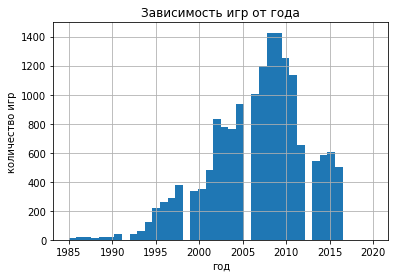

In [142]:
# посмотрим зависимость на графике
games['year_of_release'].hist(range=(1985, 2020), bins=40)
plt.xlabel('год')
plt.ylabel('количество игр')
plt.title('Зависимость игр от года')
plt.show()

**Вывод:**
* Начало выпуска в 1985 году, видим низкое количество игр вплоть до 1995, думаю это связанно с нехваткой опыта и началом эпохи.
* С 1995 года можем наблюдать рост выпуска игр, предположу, что он связан с появлением первых чипов видеоадаптеров.
* Огромный рост до 2010, благодаря насыщенному рынку и интересу со стороны покупателя.
* Спад в 2010 году из-за появления мобильной платформы и перехода туда большей части рынка.

## 3.2. Выбор платформ с наибольшими суммарными продажами по годам.

In [143]:
# построим таблицу суммы продаж на лучших платформах
popular_platform = games.groupby('platform').agg({'sales_amount':'sum'}).sort_values(by='sales_amount', ascending=False).head()
popular_platform

,sales_amount
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


In [144]:
# посмотрим индексы платформ
popular_platform.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

In [145]:
# проведем группировку 
games.groupby('platform')['year_of_release'].nunique()

platform
2600    11
3DO      2
3DS      7
DC       7
DS      12
GB      14
GBA      9
GC       8
GEN      5
GG       1
N64      8
NES     12
NG       4
PC      27
PCFX     1
PS      11
PS2     13
PS3     12
PS4      4
PSP     13
PSV      7
SAT      6
SCD      2
SNES    10
TG16     1
WS       3
Wii     12
WiiU     5
X360    13
XB      10
XOne     4
Name: year_of_release, dtype: int64

In [146]:
# выявим лучшие платформы по продажам
platform_top = games.query('platform in @ popular_platform.index').groupby(['platform', 'year_of_release'])['sales_amount'].sum()
platform_top

platform  year_of_release
DS        1985                 0.02
          2004                17.27
          2005               130.14
          2006               119.81
          2007               146.94
                              ...  
X360      2013                88.58
          2014                34.74
          2015                11.96
          2016                 1.52
          2100                10.18
Name: sales_amount, Length: 62, dtype: float64

<AxesSubplot:title={'center':'Продажи по платформам, млн $'}, xlabel='platform,year_of_release'>

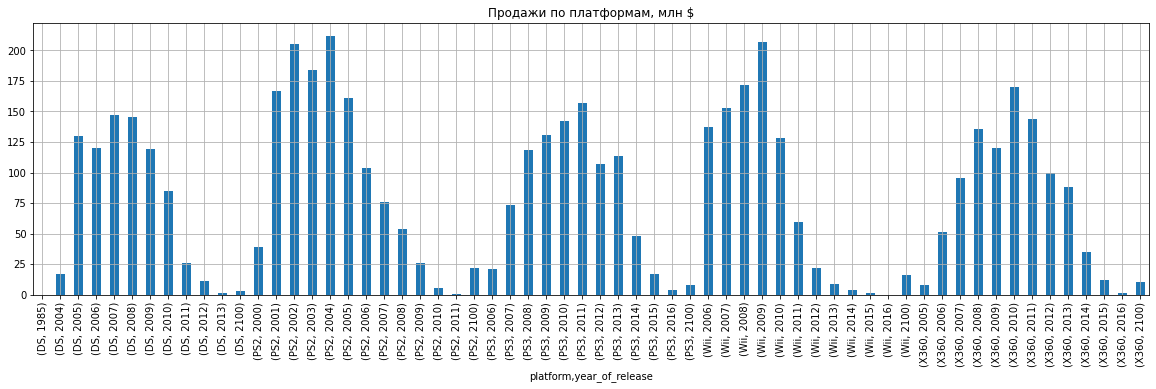

In [147]:
# посторим график распределения по годам
platform_top.plot(kind='bar', 
                 x='platform', 
                 y='sales_amount',
                 figsize=(20,5),
                 grid=True,
                 title='Продажи по платформам, млн $')

P.S. Понимаю, что можно было бы нанести на одни года разными цветами информацию о платформах, но остановился на таком варианте, чтобы не слипались графики и было проще различать.

In [148]:
# посмотрим таблицу годов образования платформ
pd.crosstab(games.platform, games.year_of_release, margins=True, margins_name="Total")

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2100,Total
platform,,,,,,,,,,,,,,,,,,,,,
2600,9,46,36,11,1,1,2,6,2,2,...,0,0,0,0,0,0,0,0,17,133
3DO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3DS,0,0,0,0,0,0,0,0,0,0,...,0,0,116,93,91,80,86,46,8,520
DC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,52
DS,0,0,0,0,0,1,0,0,0,0,...,403,323,153,23,8,0,0,0,30,2151
GB,0,0,0,0,0,0,0,0,1,10,...,0,0,0,0,0,0,0,0,1,98
GBA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,822
GC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14,556
GEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29


* Может показаться, что таблица слишком большая и не удобная, но на самом деле она скрывает в себе очень важную информацию, благодаря ей наблюдается рост количества выпускаемых игр, вплоть до 2009 года.
* Самое главное, что по этой таблице можно как устаривают платформы, для большей части платформ срок жизни составлял 4-7 лет, но это не касается популярных консолей xbox 360, PS 2/3, PSP, они существовали около 10 лет. 
* Так же была замечена платформа РС, которая так и не была подвержена устареванию.

**Вывод:**
* Выбирали платформы с наибольшими суммарными продажами и построили распределение по годам.
* Построили таблицу для понимания характерных сроков появления и исчезания платформ.
* Установили платформы, которые стали фаворитами по суммарных продажам. 


## 3.3 Определения платформ, лидирующих по продажам, выбор нескольких потенциально прибыльных платформ.


За соответствующий актуальный период я возьму 2012-2016 года.

In [149]:
# выберем актуальный период
games_from_2012 = games.query('year_of_release > 2011')

In [150]:
pd.crosstab(games_from_2012.platform,
           games_from_2012.year_of_release,
           values=games_from_2012.sales_amount,
           aggfunc='sum',
           margins=True, margins_name='total'
           ).sort_values(by='total', ascending=False)

year_of_release,2012,2013,2014,2015,2016,2100,total
platform,,,,,,,
total,355.84,361.24,331.53,267.98,129.94,98.92,1545.45
PS4,NaN,25.99,100.00,118.90,69.25,NaN,314.14
PS3,107.36,113.25,47.76,16.82,3.60,8.31,297.10
X360,99.74,88.58,34.74,11.96,1.52,10.18,246.72
3DS,51.36,56.57,43.76,27.78,15.14,1.19,195.80
XOne,NaN,18.96,54.07,60.14,26.15,NaN,159.32
WiiU,17.56,21.65,22.03,16.35,4.60,NaN,82.19
PC,23.22,12.38,13.28,8.52,5.25,3.76,66.41
Wii,21.71,8.59,3.75,1.14,0.18,16.33,51.70


**Вывод:**
 
 В результате построения таблицы выяснилось следующее:
 * Неожиданно появились новые лидеры, PS4 за 3,5 года своего существования стала лидером по продажам.
 * Наблюдаем резкое падение спроса у таких крупным платформ как: PS3, X360, 3DS. Предположу, что ухудшение продажи связано с появлением консоли нового поколения.
 * Единственный возможный конкурент для PS4 является XOne, у которого хоть не так быстро но все же продажи до 2016 расту.
 * Очевидно, потенциально выгодными платформами являются PS4 и XOne.

## 3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Выберем самые популярные платформы и построим для них диаграмму размаха, ограничим продажи до 4 млн, чтобы график был более читабельным.

In [151]:
# выбор популярных платформ
popular_platform = ['PS4', '3DS', 'XOne']

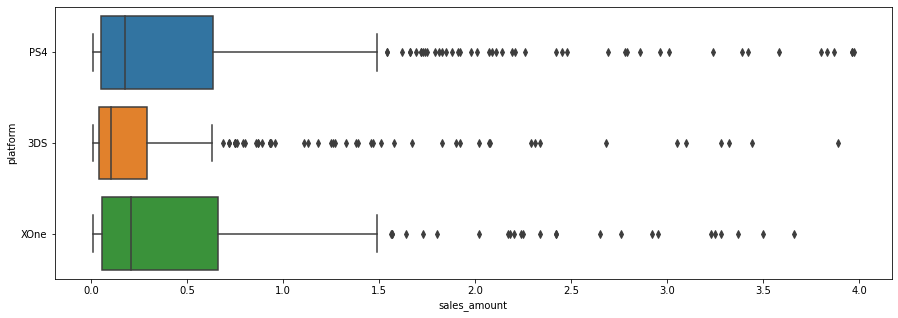

In [152]:
# построение диаграммы размаха
plt.figure(figsize=(15,5))
sns.boxplot(y='platform', x='sales_amount',
            data = games_from_2012.query('platform in @popular_platform and sales_amount <4')
            ,order=popular_platform
           )
plt.show()

**Вывод:**
* Наблюдается сильный разброс цен у платформы 3DS и у остальных, более чем в 2 раза, этого говорит нам о том, что консоль сильно устыпает в популярности 2 своим конкурентам.
* Продажи PS4 и XOne напоминают друг друга, возможно это из-за того, что даты выпуска игр на разных платформах совпадали.
* Хоть у консоли PS4 и есть эксклюзивные релизы, которые выводят PS4 вперед по выручке и количеству игр, но boxplot показывает, что разброс выручки от игр на PS4 и XOne одинаковый.

## 3.5 Влияние отзывов пользователей и критиков на продажи внутри одной платформы.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Выберем одну из лидеров среди консолей XOne, оставим продажи до 5 млн и уберем пропуски в оценках.

In [153]:
# создаем отдельный датафрейм
xone_data = games_from_2012.loc[(games_from_2012['sales_amount'] < 5)
                                & (games_from_2012['platform'] == 'XOne')
                                & (games_from_2012['critic_score'].notna())
                                & (games_from_2012['user_score'].notna())]

<function matplotlib.pyplot.show(close=None, block=None)>

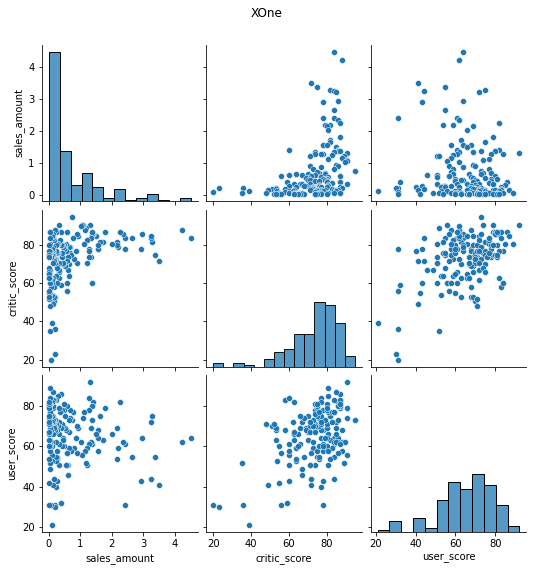

In [154]:
# построение диаграммы рассеяния 
diagram = sns.pairplot(xone_data[['sales_amount', 'critic_score', 'user_score']])
diagram.fig.suptitle('XOne', y=1.05)
plt.show

Text(0.5, 1.0, 'Heatmap XOne')

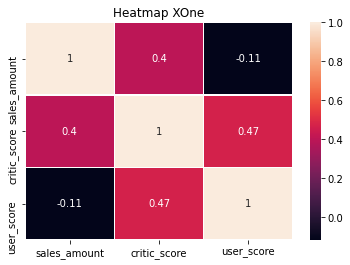

In [155]:
# посмортим корреляцию 
sns.heatmap(xone_data[['sales_amount', 'critic_score', 'user_score']].corr(), linewidths=.2, annot=True)
plt.title('Heatmap XOne')

**Вывод:**
* Наблюдается умеренная зависимость продаж от отзывов критиков, видно, что у кассовых игр хорошие отзывы. 
* Что касается отзывов пользователей, то их корреляция с продажами игр близка к 0, пользователи более критичны в отношении игр и ставят плохие оченки даже очень прибыльным проектам.
* Интересно наблюдать отличную корреляцию между отзывами критиков и пользователей, это значит, что их оценки часто совпадают или находятся близко друг с другом.

## 3.6 Соотнесем выводы с другими перспективными платформами.

Посмотрим корреляцию на 2 других платформах.

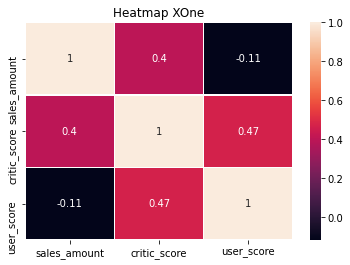

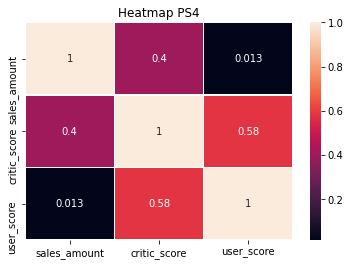

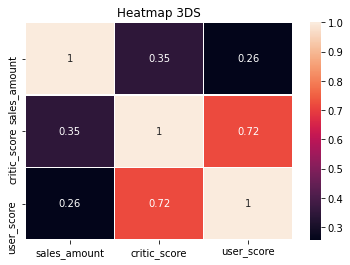

In [156]:
ps4_data = games_from_2012.loc[(games_from_2012['sales_amount'] < 5)
                                & (games_from_2012['platform'] == 'PS4')
                                & (games_from_2012['critic_score'].notna())
                                & (games_from_2012['user_score'].notna())]
data_3ds = games_from_2012.loc[(games_from_2012['sales_amount'] < 5)
                                & (games_from_2012['platform'] == '3DS')
                                & (games_from_2012['critic_score'].notna())
                                & (games_from_2012['user_score'].notna())]
sns.heatmap(xone_data[['sales_amount', 'critic_score', 'user_score']].corr(), linewidths=.2, annot=True)
plt.title('Heatmap XOne')
plt.show()
sns.heatmap(ps4_data[['sales_amount', 'critic_score', 'user_score']].corr(), linewidths=.2, annot=True)
plt.title('Heatmap PS4')
plt.show()
sns.heatmap(data_3ds[['sales_amount', 'critic_score', 'user_score']].corr(), linewidths=.2, annot=True)
plt.title('Heatmap 3DS')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

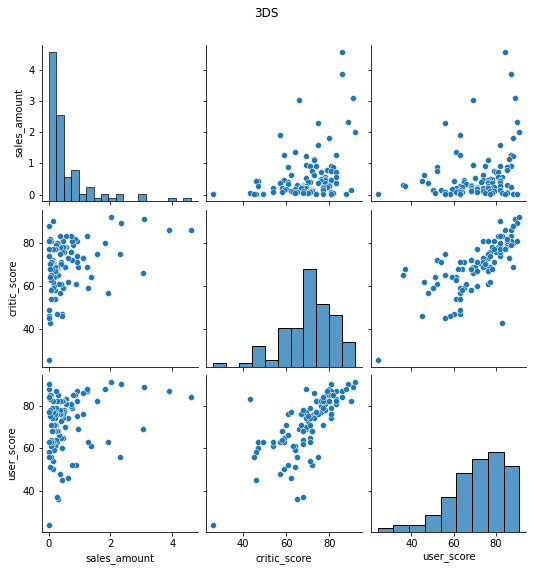

In [157]:
# построение диаграммы рассеяния 
diagram = sns.pairplot(data_3ds[['sales_amount', 'critic_score', 'user_score']])
diagram.fig.suptitle('3DS', y=1.05)
plt.show

**Вывод:**
* Как было ранее установлено, платформы PS4 и XOne очень похожи, этот факт подтверждает и коэффициенты корреляции.
* Что касается консоли 3DS, то здесь мы наблюдаем более высокую зависимость продаж от оценок пользователей, так же здесь более высокая корреляция между отзывами критиков и пользователей.

## 3.7 Изучение распределения игр по жанрам.

Узнаем информацию о самых прибыльных жанрах, узнаем, выделяются ли жанры с высокими и низкими продажами.

In [158]:
# построим сводную таблицу
games_from_2012.pivot_table(index='genre'
                            ,columns='year_of_release'
                            ,values='sales_amount'
                            ,aggfunc='mean'
                            ,margins=True
                            ,margins_name='total').sort_values(by='total', ascending=False)

year_of_release,2012,2013,2014,2015,2016,2100,total
genre,,,,,,,
Shooter,1.494792,1.051525,1.387447,1.985588,0.813191,0.410741,1.205420
Platform,1.670000,0.681667,0.881000,0.465385,0.215333,0.222000,0.665474
Sports,0.563333,0.776792,0.836111,0.692203,0.489375,0.514286,0.653774
Role-Playing,0.601410,0.626056,0.512584,0.482564,0.336667,0.204706,0.507183
total,0.544931,0.664044,0.570620,0.442211,0.258845,0.367732,0.489842
Misc,0.600541,0.601667,0.556667,0.296667,0.081250,0.421379,0.440090
Action,0.450000,0.833401,0.517181,0.284664,0.169157,0.445968,0.428884
Racing,0.453667,0.773125,0.617037,0.448333,0.116250,0.225217,0.425217
Fighting,0.316552,0.354500,0.689130,0.376190,0.279375,0.405833,0.407934


Выделим из всего списка 5 самых популярных жанров, чтобы не было путаницы на графиках.

In [159]:
# выделяем популярные жанры
top_genres = ['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc']
sales_by_genres = games_from_2012.query('genre in @top_genres').pivot_table(index='genre'
                            ,columns='year_of_release'
                            ,values='sales_amount'
                            ,aggfunc='sum')

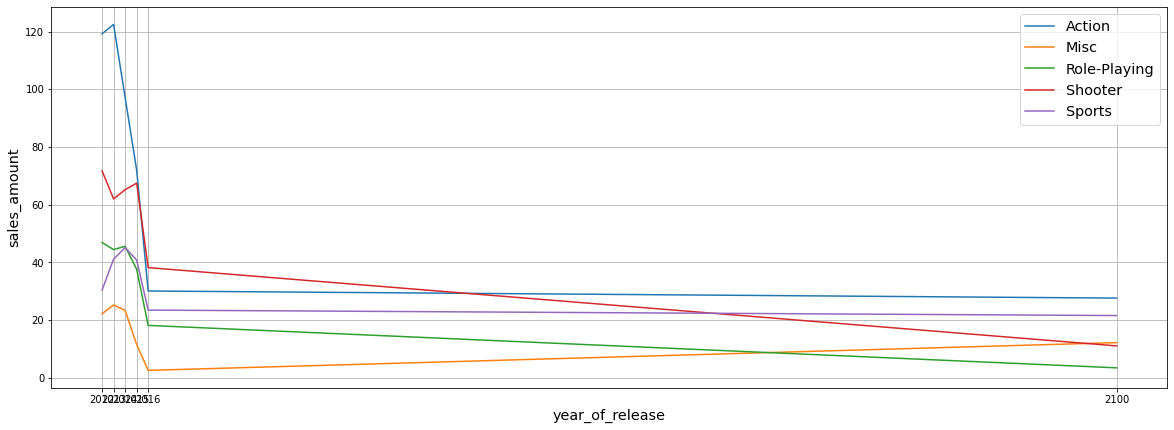

In [160]:
# построим график 
x_ticks = games_from_2012['year_of_release'].unique()

fig, ax = plt.subplots(figsize=(20,7))
sales_by_genres.T.plot(kind='line',  ax=ax, grid=True, xticks=x_ticks)
plt.ylabel('sales_amount',fontsize='x-large')
plt.xlabel('year_of_release',fontsize='x-large')
plt.legend(fontsize='x-large')
plt.show()

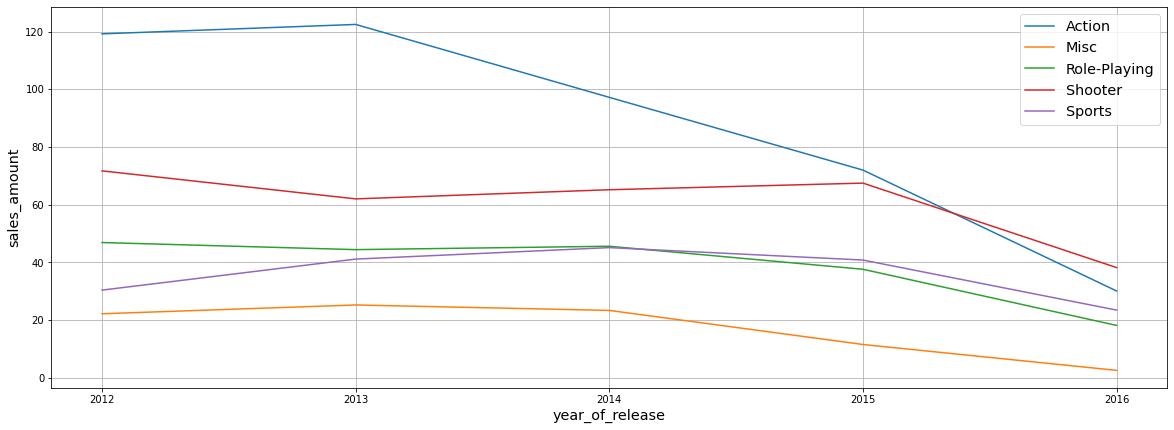

In [161]:
# построим график 
x_ticks = games_from_2012['year_of_release'].unique()[:-1]

sales_by_genres_tmp = sales_by_genres.drop(labels=[2100], axis='columns')

fig, ax = plt.subplots(figsize=(20,7))
sales_by_genres_tmp.T.plot(kind='line',  ax=ax, grid=True, xticks=x_ticks)
plt.ylabel('sales_amount',fontsize='x-large')
plt.xlabel('year_of_release',fontsize='x-large')
plt.legend(fontsize='x-large')
plt.show()

**Вывод:**
* Можем наблюдать сильное падение у жанра `Action` с 2013 года.
* Падение продаж не обошло и остальные жанры в 2016 году, но так как за этот год данные были предоставлены не в полном объеме, это все объясняет.
* Жанры можно выделить следующим образом, `Shooter` занимает уверенное 1 место, `Action` занимает 2 место, но с такой тенденцией они быстро слетят ниже по статусу, 3 место за `Sports`, 4 место за `Role-Playing` и список завершает жанр `Misc`.

## 4. Составим портрет пользователя каждого региона.

Выделим топ-5 платформ по продажам в Северной Америке.

In [162]:
# построим простую сводную таблицу  
games_from_2012.stb.freq(['platform'], value='na_sales').head()

,platform,na_sales,percent,cumulative_na_sales,cumulative_percent
0,X360,146.78,22.577370,146.78,22.577370
1,PS4,108.74,16.726143,255.52,39.303513
2,PS3,106.74,16.418507,362.26,55.722021
3,XOne,93.12,14.323510,455.38,70.045530
4,3DS,56.15,8.636867,511.53,78.682397


Наблюдаем, что на долю X-бокс приходится больше продаж, чем на PS в целом, почти 85% рынка приставок занимают таких платформы, как PS, 3DS и X-боксы. Посмотрим динамику по годам.

In [163]:
# построим таблицу динамики по годам
pd.crosstab(games_from_2012.platform, 
            games_from_2012.year_of_release,
            values=games_from_2012.na_sales,
            aggfunc='sum',
           margins=True,
           margins_name='total').sort_values(by='total', ascending=False)

year_of_release,2012,2013,2014,2015,2016,2100,total
platform,,,,,,,
total,153.26,153.65,132.27,106.86,44.93,59.15,650.12
X360,58.39,53.36,20.25,7.36,0.69,6.73,146.78
PS4,NaN,10.13,34.75,42.37,21.49,NaN,108.74
PS3,39.88,41.45,16.39,4.99,0.67,3.36,106.74
XOne,NaN,11.85,30.97,36.03,14.27,NaN,93.12
3DS,17.11,15.56,12.33,6.17,4.14,0.84,56.15
WiiU,8.89,9.85,10.50,6.76,2.10,NaN,38.10
Wii,10.89,4.48,1.59,0.43,0.06,10.03,27.48
PC,8.01,3.88,3.51,2.36,1.36,1.19,20.31


**Вывод:**

Наблюдаем, что существует огромное превосходство у компании Microsoft, причинами этого может быть  тот факт, что в Северной Америке любят отечественного производителя и выбирают именно его из всех остальных конкурентов. Так же никто не отменял тот факт, что эта компания имеет отличную репутацию и массовую рекламу по всему миру.

Теперь изучим популярные на этом континенте жанры.

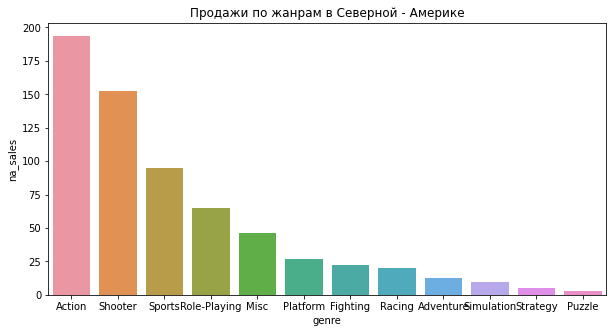

In [164]:
# построим график популярности жанров 
genres_na = games_from_2012.stb.freq(['genre'], value='na_sales')
plt.figure(figsize=(10,5))
sns.barplot(data=genres_na, y='na_sales' , x='genre')
plt.title('Продажи по жанрам в Cеверной - Америке')
plt.show()

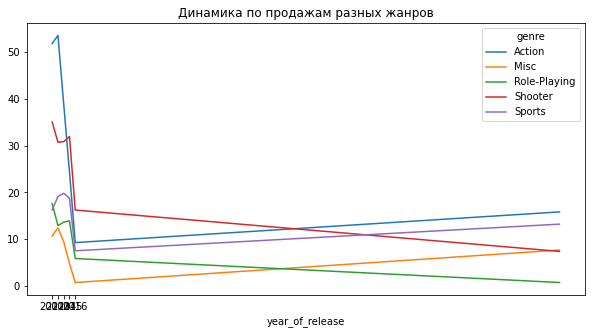

In [165]:
# построим зависимость по годам 
games_from_2012_na_top_genres = games_from_2012.query('genre in ["Action","Shooter","Sports","Role-Playing","Misc"]')
fig, ax = plt.subplots(figsize=(10,5))
pd.crosstab(games_from_2012_na_top_genres.genre, 
            games_from_2012_na_top_genres.year_of_release,
            values=games_from_2012_na_top_genres.na_sales,
            aggfunc='sum').T.plot(ax = ax, xticks=x_ticks)
plt.title('Динамика по продажам разных жанров')
plt.show()

**Вывод:**

Так же можно наблюдать, что и в Северной Америке жанр `Action` переживает так же не лучшие времена, тем не менее входит в топ-5. Петерка лучших жанров кстати такая е, как и во всем мире.

Теперь посмотрим результаты в Европе.

In [166]:
# построим простую сводную таблицу  
games_from_2012.stb.freq(['platform'], value='eu_sales').head()

,platform,eu_sales,percent,cumulative_eu_sales,cumulative_percent
0,PS4,141.09,26.556618,141.09,26.556618
1,PS3,109.94,20.693420,251.03,47.250038
2,X360,76.96,14.485770,327.99,61.735808
3,XOne,51.59,9.710510,379.58,71.446318
4,3DS,42.85,8.065427,422.43,79.511745


Наблюдаем топ-5 платформ в Европе.

In [167]:
# построим таблицу динамики по годам
pd.crosstab(games_from_2012.platform, 
            games_from_2012.year_of_release,
            values=games_from_2012.eu_sales,
            aggfunc='sum',
           margins=True,
           margins_name='total').sort_values(by='total', ascending=False)

year_of_release,2012,2013,2014,2015,2016,2100,total
platform,,,,,,,
total,114.59,121.55,122.74,96.72,51.22,24.46,531.28
PS4,NaN,11.05,46.50,51.76,31.78,NaN,141.09
PS3,39.05,42.27,18.24,6.04,1.26,3.08,109.94
X360,32.00,27.03,11.28,3.50,0.71,2.44,76.96
XOne,NaN,5.34,18.15,18.47,9.63,NaN,51.59
3DS,11.68,14.84,8.73,5.06,2.33,0.21,42.85
PC,12.40,7.39,8.87,5.57,3.53,2.07,39.83
WiiU,5.28,6.70,6.66,5.01,1.48,NaN,25.13
Wii,5.99,3.34,1.86,0.62,0.11,3.89,15.81


Наблюдаем явную популярность у Play Station, затем XBox

Посмотрим на прдпочтения по жанрам.

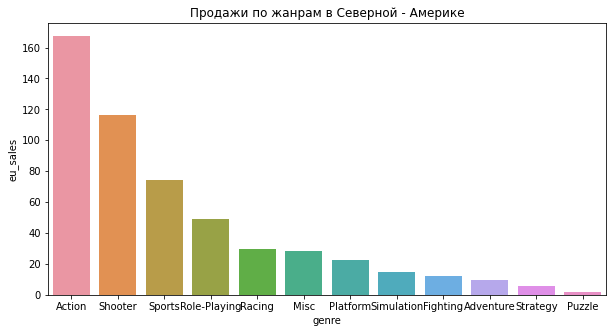

In [168]:
eu_genres_dist = games_from_2012.stb.freq(['genre'], value='eu_sales')
plt.figure(figsize=(10,5))
sns.barplot(data=eu_genres_dist, y='eu_sales' , x='genre')
plt.title('Продажи по жанрам в Cеверной - Америке')
plt.show()

**Вывод:**

Европейские пользователи имеют почти такие же предпочтения, единственное отличие, это 5 место, его занял жанр гонки.

Осталось посмотреть Японию.

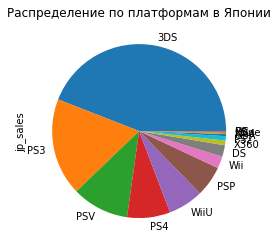

In [169]:
games_from_2012.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie')
plt.title('Распределение по платформам в Японии')
plt.show()

**Вывод:**

Как не странно, самой большой популярностью пользуется 3DS, американские платформы и близко не приблизились к лидеру.

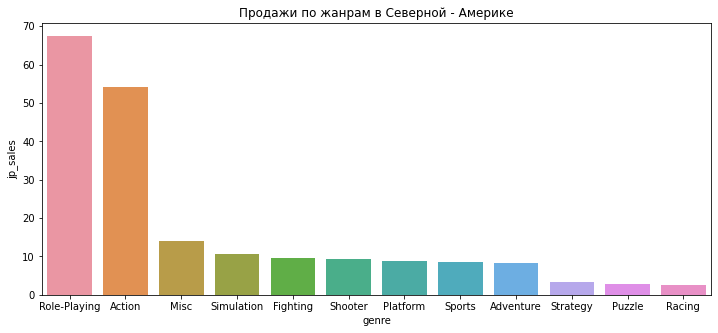

In [170]:
jp_genres_dist = games_from_2012.stb.freq(['genre'], value='jp_sales')
plt.figure(figsize=(12,5))
sns.barplot(data=jp_genres_dist, y='jp_sales' , x='genre')
plt.title('Продажи по жанрам в Cеверной - Америке')
plt.show()

**Вывод:** 

У японцев топ-5 жанров отличаются от Европы и Америки, 1 место занимают ролевые игры, на 5 месте расположились сражения.

## 4.1 Влияние рейтинга ESRB на продажи в отдельном регионе.

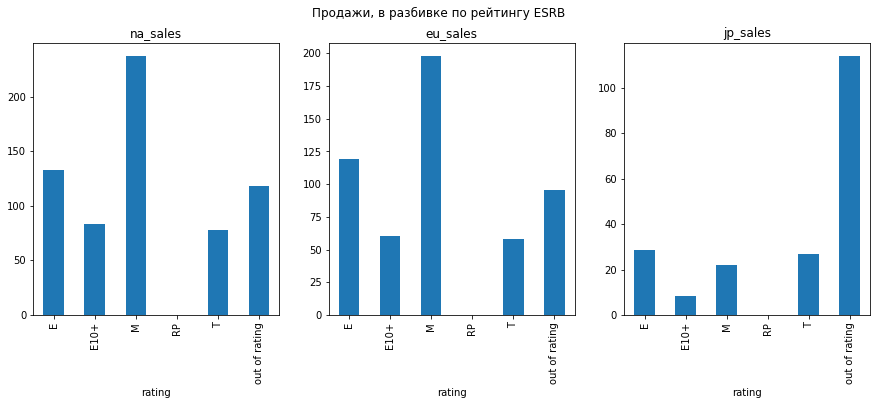

In [171]:
sales = ['na_sales', 'eu_sales', 'jp_sales']
countries = ['C-A', 'Europe','Japan']
fig, axs = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Продажи, в разбивке по рейтингу ESRB')
for i, sale in enumerate(sales):
    for country in countries:
        games_from_2012.groupby('rating')[sale].sum().plot(kind='bar', ax=axs[i], title=sale)

**Вывод:**

В Северной Америке и Европе наибольшим спросом пользуются игры с рейтингом M (для взрослых), в то время как в Японии популярны рейтинги E (для всех), T (подростки) и М практически в равной степени.

## 5. Проверка гипотез.

## 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H0** - рейтенги пользователей платформ Xbox One и PC равны 

**H1** - рейтенги не равны

Возьмем уровень значимости = 5%. 

In [172]:
# проверка распределений на нормальность
xbox_population = games_from_2012.loc[(games_from_2012['platform'] == 'XOne') & (games_from_2012['user_score'].notna())]
pc_population = games_from_2012.loc[(games_from_2012['platform'] == 'PC') & (games_from_2012['user_score'].notna())]

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


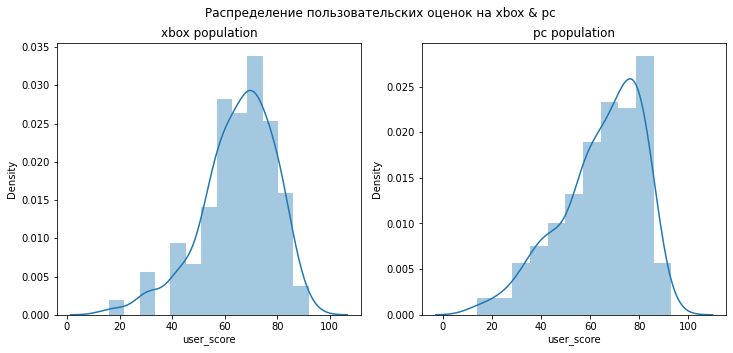

In [173]:
# построим диаграмму распределения 
fig, axs = plt.subplots(1,2, figsize=(12,5))
plt.suptitle('Распределение пользовательских оценок на xbox & pc')
sns.distplot(xbox_population['user_score'], ax=axs[0]).set_title('xbox population');
sns.distplot(pc_population['user_score'], ax=axs[1]).set_title('pc population');

P.S. Использую distplot для наглядности смещения.

Диаграмма показала, что оба распределения ненормальные, мы наблюдаем значительное смещение влево. Таким образом была отвергнута нулевая гипотеза, что выборка взята из нормального распределения.

In [174]:
# сравним дисперсии 
st.levene(xbox_population['user_score'], pc_population['user_score'])

LeveneResult(statistic=6.191696408272727, pvalue=0.01324016243374827)

Значения не позволяют отвергнуть гипотизу о равенстве дисперсия, соответственно признаем что дисперсии наших выборок приблизительно равны.

In [175]:
# проведем тест Стьюдента
ttest = st.ttest_ind(xbox_population['user_score'], pc_population['user_score'], equal_var=True)
ttest

Ttest_indResult(statistic=0.40167793553698994, pvalue=0.6881350504358005)

In [176]:
xbox_mean = xbox_population['user_score'].mean()
pc_mean = pc_population['user_score'].mean()
print('Среднее выборочное значение пользовательского рейтинга xbox one -', xbox_mean)
print('Среднее выборочное значение пользовательского рейтинга pc -', pc_mean)

Среднее выборочное значение пользовательского рейтинга xbox one - 65.21428571428571
Среднее выборочное значение пользовательского рейтинга pc - 64.5972850678733


**Вывод:** 

Тест Стьюдента показал значение p-value больше уровня значимости, это значит, что мы не можем отвергать нулевую гипотезу. Этот факт свидетельствует нам о том, что средний пользовательский рейтинг платформ Xbox One & PC равны.

## 5.2 Cредние пользовательские рейтинги жанров Action и Sports  разные.

H0 - средний пользовательский рейтинг жанра Action равен рейтингу Sports

H1 - средние пользовательиские рейтинги этих жанров не равны.

Уровень значимости возьмем так же 5%.

In [177]:
action_population = games_from_2012.loc[(games_from_2012['genre'] == 'Action') & (games_from_2012['user_score'].notna())]
sports_population = games_from_2012.loc[(games_from_2012['genre'] == 'Sports') & (games_from_2012['user_score'].notna())]

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


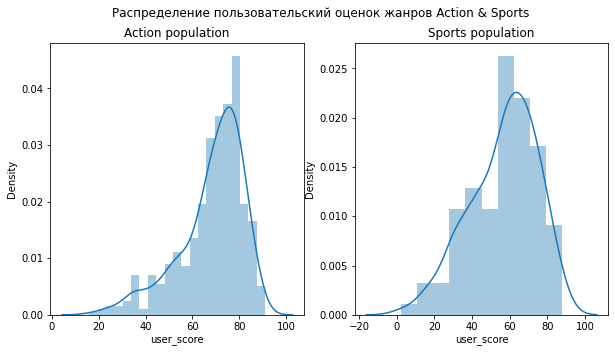

In [178]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle('Распределение пользовательский оценок жанров Action & Sports')
sns.distplot(action_population['user_score'], ax=axs[0]).set_title('Action population')
sns.distplot(sports_population['user_score'],ax=axs[1]).set_title('Sports population')
plt.show()

По графикам видно, что распределение ненормальное.

In [179]:
ttest2 = st.ttest_ind(action_population['user_score'], sports_population['user_score'], equal_var=True)
ttest2

Ttest_indResult(statistic=9.703478177141752, pvalue=4.398099292150631e-21)

In [180]:
action_mean = action_population['user_score'].mean()
sports_mean = sports_population['user_score'].mean()
print('Среднее выборочное значение пользовательского рейтинга жанра Action -', action_mean)
print('Среднее выборочное значение пользовательского рейтинга жанра Sports -', sports_mean)

Среднее выборочное значение пользовательского рейтинга жанра Action - 68.25852782764811
Среднее выборочное значение пользовательского рейтинга жанра Sports - 56.57142857142857


p-уровень значимости оказался безумно маленьким, это означает, что следует отклонить нулевую гипотезу. Это значит, что средний пользовательский рейтинг проверяемых жанров отличается.

**Вывод:**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые 
* Средние пользовательские рейтинги жанров Action и Sports разные

## 6. Общий вывод.

В ходе проделанной работы были изучены и обработаны данные по продажам игр:

* Изменили тип данных, регистр колонок, обработали пропуски.
* Определены самые прибыльные платформы за все время: PS2, X360, PS3, Wii и DS.
* определена скорость устаревания платформ, в прошлом платформы устаревали за 4-7 лет, современные платформы существуют дольше, до 10 лет.
* на текущий момент существуют две доминирующие консоли, от Microsoft и от Sony.
* исследованы предпочтения игроков из трех разных регионов.
* изучены жанровые препочтения игроков. Топ-5 любимых жанров в С-Америке и Европе похожи, за исключением одной позиции (action, shooter, sports, role-playing). В Японский топ попали такие жанры как Fighting и Simulation, а на первое место вышел Role-Playing.
* проверены две гипотезы, установлено, что средние пользовательские рейтинги XBox One и PC не отличаются и средние пользовательские рейтинги жанров ACtion и Sports разные.
* Были выявлены следующие факторы, влияющие на успех игры: в ближайшее время нужно преимущественно делать акцент на самые актуальные платформы ( X-Box One, PS4 и 3DS), на самые популярные жанры ( Action, Shooter, Sports, Role-Playing, Misc) и нужно отдать предпочтение играм с рейтингом М и высоким рейтингом критиков.